In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
DATA_DIR = "/content/drive/MyDrive/TarlTech/data/raw/maize_disease"

In [3]:
import os

classes = os.listdir(DATA_DIR)
print("classes: ", classes)

for cls in classes:
  cls_path =os.path.join(DATA_DIR, cls)
  print(cls, "->", len(os.listdir(cls_path)), "images")

classes:  ['Healthy', 'Gray_Leaf_Spot', 'Common_Rust', 'Blight']
Healthy -> 1162 images
Gray_Leaf_Spot -> 574 images
Common_Rust -> 1306 images
Blight -> 1146 images


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

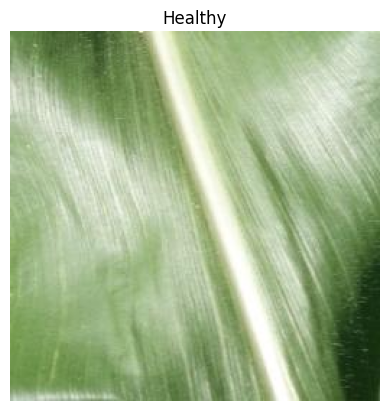

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import random

cls = random.choice(classes)
img_name = random.choice(os.listdir(os.path.join(DATA_DIR, cls)))
img_path = os.path.join(DATA_DIR, cls, img_name)

img = Image.open(img_path)

plt.imshow(img)
plt.title(cls)
plt.axis("off")

In [5]:
from PIL import Image
import os

corrupt_images = []

for cls in os.listdir(DATA_DIR):
  cls_path = os.path.join(DATA_DIR, cls)
  for img_name in os.listdir(cls_path):
    img_path = os.path.join(cls_path, img_name)
    try:
      img = Image.open(img_path)
      img.verify()
    except Exception:
      corrupt_images.append(img_path)

print("Corrupt images found:", len(corrupt_images))

Corrupt images found: 0


In [6]:
from collections import Counter

image_sizes = []

for cls in os.listdir(DATA_DIR):
  cls_path = os.path.join(DATA_DIR, cls)
  for img_name in os.listdir(cls_path):
    img_path = os.path.join(cls_path, img_name)
    with Image.open(img_path) as img:
      image_sizes.append(img.size)

size_counts = Counter(image_sizes)
size_counts.most_common(5)


[((256, 256), 3852),
 ((1024, 768), 8),
 ((3264, 2448), 7),
 ((675, 1200), 7),
 ((750, 350), 5)]

In [7]:
class_counts = {}

for cls in os.listdir(DATA_DIR):
  class_counts[cls] = len(os.listdir(os.path.join(DATA_DIR, cls)))

class_counts

{'Healthy': 1162, 'Gray_Leaf_Spot': 574, 'Common_Rust': 1306, 'Blight': 1146}

In [8]:
import random

train_ratio = 0.8

splits = {}

for cls in os.listdir(DATA_DIR):
  images = os.listdir(os.path.join(DATA_DIR, cls))
  random.shuffle(images)

  split_idx = int(len(images) * train_ratio)
  splits[cls] = {
      "train": images[:split_idx],
      "val": images[split_idx:]
  }

for cls, data in splits.items():
  print(cls, "-> train:", len(data["train"]), "val:", len(data["val"]))

Healthy -> train: 929 val: 233
Gray_Leaf_Spot -> train: 459 val: 115
Common_Rust -> train: 1044 val: 262
Blight -> train: 916 val: 230
